In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem, ttest_ind

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
drug_trial = pd.merge(mouse_drug_data, clinical_trial_data, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
drug_trial.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
grouped_mean = drug_trial.groupby(['Drug', 'Timepoint']).mean()

# Convert to DataFrame
grouped_mean = pd.DataFrame(grouped_mean[["Tumor Volume (mm3)"]])
grouped_mean = grouped_mean.reset_index()

# Preview DataFrame
grouped_mean.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
grouped_sems = drug_trial.groupby(['Drug', 'Timepoint']).sem()

# Convert to DataFrame
grouped_sems = pd.DataFrame(grouped_sems[["Tumor Volume (mm3)"]])
grouped_sems = grouped_sems.reset_index()

# Preview DataFrame
grouped_sems.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
pivot_mean = grouped_mean.pivot(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")
pivot_sems = grouped_sems.pivot(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")

# Preview that Reformatting worked
pivot_mean.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


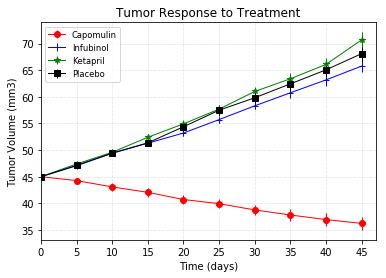

In [5]:
# Generate the Plot (with Error Bars)
fig, ax = plt.subplots()
xaxis = np.arange(0, 50, 5)

Capomulin_mean = pivot_mean["Capomulin"].tolist()
Capomulin_sems = pivot_sems["Capomulin"].tolist()
ax.errorbar(xaxis, Capomulin_mean, Capomulin_sems, marker="o", color="r", linewidth=1, label="Capomulin")

Infubinol_mean = pivot_mean["Infubinol"].tolist()
Infubinol_sems = pivot_sems["Infubinol"].tolist()
ax.errorbar(xaxis, Infubinol_mean, Infubinol_sems, marker="+", color="b", linewidth=1, label="Infubinol")

Ketapril_mean = pivot_mean["Ketapril"].tolist()
Ketapril_sems = pivot_sems["Ketapril"].tolist()
ax.errorbar(xaxis, Ketapril_mean, Ketapril_sems, marker="*", color="g", linewidth=1, label="Ketapril")

Placebo_mean = pivot_mean["Placebo"].tolist()
Placebo_sems = pivot_sems["Placebo"].tolist()
ax.errorbar(xaxis, Placebo_mean, Placebo_sems, marker="s", color="k", linewidth=1, label="Placebo")

plt.title("Tumor Response to Treatment")
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")

ax.legend(loc="best", fontsize="small", fancybox=True)

tick_locations = [value for value in xaxis]
ax.set_xticks(tick_locations, minor=False)
ax.grid('on', which='major', axis='both', linestyle='dotted', linewidth=0.5)

plt.xlim(0, max(xaxis)+2)

# Save the Figure
plt.savefig("Images/TumorLineChart.png")

# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [6]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
grouped_mean_met = drug_trial.groupby(['Drug', 'Timepoint']).mean()

# Convert to DataFrame
grouped_mean_met = pd.DataFrame(grouped_mean_met[["Metastatic Sites"]])
grouped_mean_met = grouped_mean_met.reset_index()

# Preview DataFrame
grouped_mean_met.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [7]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
grouped_sems_met = drug_trial.groupby(['Drug', 'Timepoint']).sem()

# Convert to DataFrame
grouped_sems_met = pd.DataFrame(grouped_sems_met[["Metastatic Sites"]])
grouped_sems_met = grouped_sems_met.reset_index()

# Preview DataFrame
grouped_sems_met.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [8]:
# Minor Data Munging to Re-Format the Data Frames
pivot_mean_met = grouped_mean_met.pivot(index="Timepoint", columns="Drug", values="Metastatic Sites")
pivot_sems_met = grouped_sems_met.pivot(index="Timepoint", columns="Drug", values="Metastatic Sites")

# Preview that Reformatting worked
pivot_mean_met.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


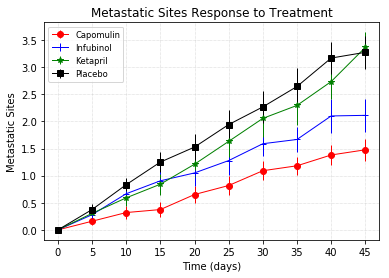

In [9]:
# Generate the Plot (with Error Bars)
fig2, ax2 = plt.subplots()
xaxis2 = np.arange(0, 50, 5)

Capomulin_mean2 = pivot_mean_met["Capomulin"].tolist()
Capomulin_sems2 = pivot_sems_met["Capomulin"].tolist()
ax2.errorbar(xaxis, Capomulin_mean2, Capomulin_sems2, marker="o", color="r", linewidth=1, label="Capomulin")

Infubinol_mean2 = pivot_mean_met["Infubinol"].tolist()
Infubinol_sems2 = pivot_sems_met["Infubinol"].tolist()
ax2.errorbar(xaxis, Infubinol_mean2, Infubinol_sems2, marker="+", color="b", linewidth=1, label="Infubinol")

Ketapril_mean2 = pivot_mean_met["Ketapril"].tolist()
Ketapril_sems2 = pivot_sems_met["Ketapril"].tolist()
ax2.errorbar(xaxis, Ketapril_mean2, Ketapril_sems2, marker="*", color="g", linewidth=1, label="Ketapril")

Placebo_mean2 = pivot_mean_met["Placebo"].tolist()
Placebo_sems2 = pivot_sems_met["Placebo"].tolist()
ax2.errorbar(xaxis, Placebo_mean2, Placebo_sems2, marker="s", color="k", linewidth=1, label="Placebo")

plt.title("Metastatic Sites Response to Treatment")
plt.xlabel("Time (days)")
plt.ylabel("Metastatic Sites")

ax2.legend(loc="best", fontsize="small", fancybox=True)

tick_locations2 = [value for value in xaxis]
ax2.set_xticks(tick_locations2, minor=False)
ax2.grid('on', which='major', axis='both', linestyle='dotted', linewidth=0.5)

plt.xlim(-2, max(xaxis)+2)

# Save the Figure
plt.savefig("Images/MetastaticLineChart.png")

# Show the Figure
plt.show()

## Survival Rates

In [10]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
grouped_count_mice = drug_trial.groupby(['Drug', 'Timepoint']).count()

# Convert to DataFrame
grouped_count_mice = pd.DataFrame(grouped_count_mice[["Mouse ID"]])
grouped_count_mice = grouped_count_mice.rename(columns={"Mouse ID":"Mouse Count"})
grouped_count_mice = grouped_count_mice.reset_index()

# Preview DataFrame
grouped_count_mice.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [11]:
# Minor Data Munging to Re-Format the Data Frames
pivot_count_mice = grouped_count_mice.pivot(index="Timepoint", columns="Drug", values="Mouse Count")

# Preview the Data Frame
pivot_count_mice.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


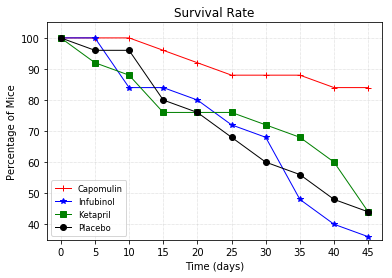

In [12]:
# Generate the Plot (Accounting for percentages)
fig3, ax3 = plt.subplots()
xaxis3 = np.arange(0, 50, 5)

Capomulin_percents = (pivot_count_mice["Capomulin"]/25)*100
Capomulin, = plt.plot(xaxis3, Capomulin_percents, marker="+",color="r", linewidth=1, label="Capomulin")

Infubinol_percents = (pivot_count_mice["Infubinol"]/25)*100
Infubinol, = plt.plot(xaxis3, Infubinol_percents, marker="*",color="b", linewidth=1, label="Infubinol")

Ketapril_percents = (pivot_count_mice["Ketapril"]/25)*100
Ketapril, = plt.plot(xaxis3, Ketapril_percents, marker="s",color="g", linewidth=1, label="Ketapril")

Placebo_percents = (pivot_count_mice["Placebo"]/25)*100
Placebo, = plt.plot(xaxis3, Placebo_percents, marker="o",color="k", linewidth=1, label="Placebo")


plt.title("Survival Rate")
plt.xlabel("Time (days)")
plt.ylabel("Percentage of Mice")

ax3.legend(loc="best", fontsize="small", fancybox=True)

tick_locations3 = [value for value in xaxis]
ax3.set_xticks(tick_locations3, minor=False)
ax3.grid('on', which='major', axis='both', linestyle='dotted', linewidth=0.5)

plt.xlim(-2, max(xaxis3)+2)
plt.ylim(35., 105.)

# Save the Figure
plt.savefig("Images/SurvivalLineChart.png")

# Show the Figure
plt.show()

## Summary Bar Graph

In [13]:
# Calculate the percent changes for each drug
percent_change = (pivot_mean.loc[45, :] - pivot_mean.loc[0, :])/pivot_mean.loc[0, :] * 100

# Display the data to confirm
percent_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

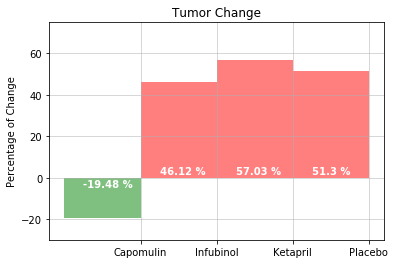

In [14]:
# Store all Relevant Percent Changes into a Tuple
#Splice the data between passing and failing drugs
percent_change_df = pd.DataFrame(percent_change)
percent_change_df = percent_change_df.rename(columns = {0:"% Change"})
percent_change_df = percent_change_df.round(2)
percent_change_df = percent_change_df.reset_index()
subset_percent_chg = percent_change_df.iloc[[0, 2, 3, 5]]
change = subset_percent_chg["% Change"].values

fig4, ax4 = plt.subplots()
xaxis4 = np.arange(len(change))
plt.bar(xaxis4, change, alpha=.5, color=np.where(change<0, 'green', 'red'), align="edge", width=-1, tick_label=change)

# Orient widths. Add labels, tick marks, etc. 
plt.title("Tumor Change")
plt.ylabel("Percentage of Change")

tick_locations = [value for value in xaxis4]
plt.xticks(tick_locations, ["Capomulin", "Infubinol", "Ketapril", "Placebo"])
plt.grid('on', which='major', axis='both', linestyle='solid', linewidth=0.5)

plt.ylim(-30, 75)

# Use functions to label the percentages of changes
for i, v in enumerate(change):
    ax4.text(i-.75,3,str(v)+" %",color="white", va="center",fontsize=10,fontweight="bold")
    ax4.text(i-.75,-3,str(v)+" %",color="white", va="center",fontsize=10,fontweight="bold")

# Call functions to implement the function calls


# Save the Figure
plt.savefig("Images/TumoreChgBarChart.png")

# Show the Figure
fig.show()